<a href="https://colab.research.google.com/github/RevazRevazashvili/TSU-python-labs/blob/main/Lab_007_Parallel_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

გამოსადეგი ბმულები
1. https://docs.python.org/3/library/threading.html

#პარალელური პროგრამირება: პროცესები და thread-ები

thread

In [ ]:
"""
პროგრამული კოდი შედგება ინსტრუქციების მიმდევრობისგან. დროის გარკვეულ შუალედში
შესასრულებელი ინსტრუქციების ნაკრები შეიძლება დაიყოს ურთიერ დამოუკიდებელ და
ურთიერთქმედ ინსტრუქციებად. (ორ ან მეტ ინსტრუქციას ეწოდება ურთიერთ დამოუკიდებელი
თუ თითოეული მათგანის შესრულება არანაირ ზეგავლენას არ ახდენს სხვა დანარჩენი
ინსტრუქციების შესრულება. წინააღმდეგ შემთხვევაში ინსტრუქციებს ეწოდებათ ურთიერთქმედი.
მაგალითად, ინსტრუქციები a = 3 + 5 და b = 5 * 8 ურთიერთ დამოუკიდებელია, ხოლო
ინსტრუქციები a = 3 + 5 და b = 5 * a - კი არა.) თანამედროვე კომპიუტერების გამოთვლითი
შესაძლებლობებიდან გამომდინარე ურთიერთ დამოუკიდებელი ინსტრუქციები შეიძლება
შესრულდეს პარალელურად, რაც გამოიწვევს კოდის შესრულებას შესაბამის ფრაგმენტზე. კოდის
ურთიერთდამოუკიდებელი ინსტრუქციების პარალელური შესრულება შესაძლებელია
უზრუნველვყოთ thread-ების გამოყენებით.
პროგრამულ კოდში გამოყენებულ thread-ებს შეუძლიათ ერთობლივად გამოიყენონ
პროგრამის მონაცემები და რესურსები (ცვლადები, ფუნქციები და ა.შ.). ყოველ thread-ს პროცესის
მსგავსად გააჩნია საკუთარი ბრძანებათა მთვლელი, რეგისტრი და სტეკი. thread-ი დროის
ნებისმიერ მომენტში იმყოფება შემდეგი მდგომარეობებიდან ერთერთში (ნახ. 8.1):
• Ready (მზადყოფნა) - მდგომარეობა, რომელშიც გადადის სისტემაში გამოჩენილი thread-ი;
• Running (შესრულება) - მდგომარეობა, როდესაც thread-ი სრულდება პროცესორზე;
• Blocked (ბლოკირებული) - მდგომარეობა, რომლის დროსაც thread-ს არ შეუძლია შესრულება
გარკვეული რესურსის საჭიროების გამო, რომელიც სისტემაში არაა ხელმისაწვდომი.
"""

thread-ის შექმნა

In [ ]:
# thread-ის შექმნის მიზანს წარმოადგენს გარკვეულ მეთოდის შესრულება. განვსაზღვროთ მეთოდი, რომლის შესრულებისთვის შევქმნით thread-ს. შევქმნათ მეთოდი, რომელიც დაბეჭდავს
# პარამეტრად გადაცემულ ტექსტს.

import threading

def thrFunc(st):
  print(f"there was called thread: {st}")

t1 = threading.Thread(target=thrFunc, args=("thread-1",))
t2 = threading.Thread(target=thrFunc, args=("thread-2",))
t1.start()
t2.start()

there was called thread: thread-1
there was called thread: thread-2


#thread კლასის მეთოდები

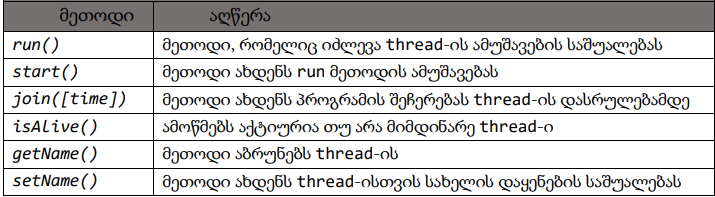

In [ ]:
"""
thread-მა რომ განახორციელოს საკუთარი დანიშნულება აუცილებელია მისი შექმნის შემდეგ
მან გამოიძახოს მეთოდი start(), ხოლო იმისათვის, რომ პროგრამამ მასში განსაზღვრულ
threadზე ადრე არ დაასრულოს საქმიანობა საჭიროა ის დაელოდოს ამუშავებული thread-ის დასრულებას
რისთვისაც thread-მა უნდა გამოიძახოს მეთოდი join().
მაშასადამე, წინა პუნქტში განსაზღვრული thread-ების ნორმალური საქმიანობის
უზრუნველსაყოფად საჭიროა კოდის შევსება შემდეგი კოდის ფრაგმენტით:
t1.start()
t1.join()
t2.start()
t2.join()
"""

thread-ის გამოყენება გამოთვლებში

In [ ]:
# data ფაილში რიცხვების ჩაწერა შემდგომი გამოთვლებისთვის

with open("data.txt", "a") as f:
  for i in range(100):
    f.write(f"{str(i)} ")
    if i%10==0:
      f.write("\n")

In [ ]:
import random as rd
import time
import threading as th
from multiprocessing import Process


N = 1000000 # სტრიქონზე რიცხვების რაოდენობა
Row = 10 # სტრიქონების რაოდენობა
a, b = 0, 100 # შუალედის დასაწყისის და ბოლოს მნიშვნელობა
with open('data.txt', 'w', encoding='utf-8') as file:
  for _ in range(Row):
    # შევქმნათ ფაილში ჩასაწერი სტრიქონი
    st = ' '.join([str(rd.randint(a, b)) for _ in range(N)]) + "\n"
    file.write(st) # მოვახდინოთ ფაილში მონაცემის ჩაწერა

def th_func(numbers, N):
  """ ფუნქცია პარამეტრად ღებულობს რიცხვებისგან შემდგარ სტრიქონს.
  სტრიქონისგან ადგენს რიცხვების სიმრავლეს და მისთვის პოულობს
  საშუალო არითმეტიკულის მნიშვნელობას და ბეჭდავს შედეგს"""
  print(f"average = { sum( [int(number) for number in numbers.split()] ) / N }")


arr = None
with open('data.txt', 'r', encoding='utf-8') as file:
 # ყოველ სტრიქონს ჩამოვაშოროთ ახალ ხაზზე გადასვლის სიმბოლო (\n)
  arr = [ar[:-1] for ar in file.readlines()]

a = time.time() # thread-ებმა დაიწყო შესრულება
for ob in arr:
  t = th.Thread(target=th_func, args=(ob,N))
  t.start()
b = time.time() # thread-ებმა დაასრულა შესრულება

t1 = time.time()
for ob in arr:
  t = Process(target=th_func, args=(ob,N))
  t.start()
t2 = time.time()


c = time.time() # დაიწყო კოდის პირდაპირი შესრულება
for st in arr:
 print(f"average = { sum([ int(num) for num in st.split() ]) / N } ")
d = time.time() # დასრულდა კოდის პირდაპირი შესრულება

average = 49.985938
average = 50.015322
average = 49.934152
average = 50.03819
average = 50.055809
average = 49.990822
average = 49.993795
average = 49.934152
average = 49.990822
average = 49.993795
average = 50.055809
average = 50.015322
average = 49.985938average = 50.023757

average = 50.03819
average = 49.990822
average = 49.993795average = 49.990582

average = 49.975298
average = 50.023757
average = 49.990582
average = 49.975298
average = 49.934152 
average = 50.055809 
average = 50.015322 
average = 49.985938 
average = 50.03819 
average = 49.990822 
average = 49.993795 
average = 50.023757 
average = 49.975298 
average = 49.990582 


In [ ]:
print(b-a)
print(t2-t1)
print(d-c)

1.9639248847961426
1.4352266788482666
5.529143810272217


სამომხმარებლო thread კლასი

In [ ]:
"""
Python ენაში შესაძლებელია მომხმარებელმა განსაზღვროს საკუთარი thread-ების კლასი
(MyThread). ამისათვის საჭიროა მან მოახდინოს კლასის შექმნა, რომელის მემკვიდრე იქნება Thread
კლასის. ამ შემხვევაში საჭიროა MyThread კლასში მოხდეს run() მეთოდის განსაზღვრა
(გადატვირთვა), რომელიც უზრუნველყოფს start() მეთოდის გამოყენებით thread ობიექტის
ამუშავებისას run() მეთოდით მისი საქმიანობის განსაზღვრას.
"""

In [ ]:
from threading import Thread
class myThread(Thread):
  d = {} # კლასის დონის წევრი (სტატიკური წევრი)
  def __init__(self, st, n):
    """ კლასის კონსტრუქტორი """
    super().__init__()
    self.name = self.getName()
    self.arr = [int(num) for num in st.split()]
    self.arrSize = n
  def average(self):
    """ მეთოდი ითვლის შესაბამისი ატრიბუტის საშუალო არითმეტიკულს """
    myThread.d[self.name] = sum(self.arr) / self.arrSize
  def __del__(self):
    """ კლასის დესტრუქტორი """
    print(f"\tAverage value = { myThread.d[self.name] }")
    print(f"{self.name} finished.")
  def run(self):
    """ მეთოდი, რომელიც ახდენს thread-ის ამუშავებას """
    print(f"{self.name} started: ")
    self.average()

thread-ების სინქრონიზაცია

In [ ]:
"""
პროგრამულ კოდში thread-ბის გამოყენებას არ შეიძლება ჰქონდეს უარყოფითი ეფექტი, თუ
thread-ები იყენებენ საერთო მეხსიერებას მხოლოდ კითხვის შესაძლებლობით. პრობლემა
წარმოიშობა იმ შემთხვევაში, როდესაც საერთო მეხსიერებაში საჭიროა მნიშვნელობის შეცვლა.
thread-ების მიერ გამოყენებულ საერთო მეხსიერებას კრიტიკული სექცია ეწოდება. რამდენიმე
thread-ის მიერ კრიტიკულ სექციაზე მიმართვისას შეიძლება წარმოიშვას სიტუაცია, რომლის
დროსაც ყველა thread-ის მიერ მნიშვნელობის შეცვლის მცდელობის შემთხვევაში მოხდა მხოლოდ
„ბოლოს“ შესრულებული thread-ის მიერ განხორციელებული ცვლილების შენახვა. ამ სიტუაციას
შეჯიბრის მდგომარეობა ეწოდება.
"""

In [ ]:
from threading import Thread
x = 0 # გლობალური ცვლადი
N = 500000
def inc_glob_value():
  """ მეთოდი ახდენს გლობალური ცვლადის მნიშვნელობის შეცვლას """
  global x # ხაზს ვუსვამთ, რომ ცვლადი გლობალურია
  x += 1
def thr_func(n):
  """ მეთოდი ახდენს გლობალური ცვლადის მნიშვნელობის გაზრდას 500000-ჯერ"""
  for _ in range(n):
    inc_glob_value()
def main():
  """ მეთოდი ახდენს 2 thraed-ის მეშვეობით გლობალური ცვლადის მნიშვნელობის გაზრდას"""
  global x
  x = 0
  t1 = Thread(target=thr_func, args=(N,))
  t2 = Thread(target=thr_func, args=(N,))
  # t3 = Thread(target=thr_func, args=(N,))
  t1.start()
  t2.start()
  # t3.start()
  t1.join()
  t2.join()
  # t3.join()
if __name__ == "__main__":
  # მოვახდინოთ main() მეთოდის რამდენიმეჯერ ამუშავება
  for i in range(5):
    main()
    print(f"After Iteration { i }: x = { x } ")

After Iteration 0: x = 1000000 
After Iteration 1: x = 1000000 
After Iteration 2: x = 1000000 
After Iteration 3: x = 1000000 
After Iteration 4: x = 1000000 


In [ ]:
"""
წარმოქმნილი სიტუაციიდან გამოსავალს წარმოადგენს thread-ების მიმართ სინქრონიზაციის
მექანიზმის გამოყენება. Python ენაში ამ მიზნით განსაზღვრულია რამდენიმე შესაძლებლობა. ჩვენ
განვიხილავთ სინქრონიზაციის Lock და RLock მექანიზმს. Lock მექანიზმი მცირე რაოდენობის
სამუშაოს შემთხვევაში არ ქმნის პრობლემას, მაგრამ უფრო მასშტაბური სამუშაოების შემთხვევაში
კი შეიძლება წარმოიშვას გარკვეული პრობლემები. ასეთ შემთხვევაში შეიძლება გამოყენებული
RLock მექანიზმი. ორივე მექანიზმში განსაზღვრულია ერთიდაიმავე სახელის მქონე ორი მეთოდი:
1.acquire() - რომელიც ახდენს კრიტიკული სექციის ჩაკეტვას, როცა მიმდინარე thread-ი
ახდენს შესაბამისი ცვლადის მნიშვნელობის შეცვლას. მეთოდის გამოყენება უნდა მოხდეს
უშუალოდ შესაბამის ცვლადზე ცვლილების განხორციელებამდე;
2.release() - რომელიც მიმდინარე thread-ის მხრიდან კრიტიკულ სექციაზე შესაბამისი
ცვლილების განხორციელების შემდეგ ხელმისაწვდომს ხდის კრიტიკულ სექციას. მეთოდის
გამოყენება უნდა მოხდეს უშუალოდ შესაბამის ცვლადზე ცვლილების განხორციელების
შემდეგ;
"""

In [ ]:
!pip install threading

In [ ]:
from threading import Thread
import threading
x = 0 # გლობალური ცვლადი
N = 500000
lock = threading.Lock()
def inc_glob_value():
  """ მეთოდი ახდენს გლობალური ცვლადის მნიშვნელობის შეცვლას """
  global x # ხაზს ვუსვამთ, რომ ცვლადი გლობალურია
  x += 1
def thr_func(n):
  for _ in range(n):
    lock.acquire()
    inc_glob_value()
    lock.release()
def main():
  """ მეთოდი ახდენს 2 thraed-ის მეშვეობით გლობალური ცვლადის მნიშვნელობის გაზრდას"""
  global x
  x = 0
  t1 = Thread(target=thr_func, args=(N,))
  t2 = Thread(target=thr_func, args=(N,))
  t1.start()
  t2.start()
  t1.join()
  t2.join()
if __name__ == "__main__":
  # მოვახდინოთ main() მეთოდის რამდენიმეჯერ ამუშავება
  for i in range(5):
    main()
    print(f"After Iteration { i }: x = { x } ")

After Iteration 0: x = 1000000 
After Iteration 1: x = 1000000 
After Iteration 2: x = 1000000 
After Iteration 3: x = 1000000 
After Iteration 4: x = 1000000 


Multiprocessing

In [ ]:
from multiprocessing import Process, current_process

def myFunc():
   print(f'There was called process:')
   print(f'\tprocess name: {current_process().name}')
   print(f'\t  process ID: {current_process().pid}')

process = Process(target=myFunc)
process.start()
process.join()


There was called process:
	process name: Process-4
	  process ID: 28566


In [ ]:
class MyProcessClass(Process):
   def __init__(self, name):
      super().__init__()
      self.name = name
   def run(self):  # ჩაშენებული ფუნქცია
      print(f"      process name: {self.name}"
            f"\n      process ID: {self.pid}"
            f"\nprocess is alive: {self.is_alive()}")
process = MyProcessClass("pr1")
process.start()
process.join()

      process name: pr1
      process ID: 29650
process is alive: True


In [ ]:
"""
რიგ შემთხვევაში შეიძლება პროცესები იყენებდნენ საზიარეო რესურსს. ასეთ შემთხვევაში
საჭიროა ასეთი რესურსის შეთანხმებული გამოყენება. პროცესების შემთხვევაშიც გვაქვს
იმავე სახელის მქონე კლასები რაც thread-ის შემთხვევაში: Lock, RLock. ასევე გვაქვს
დამატებითი მექანიზმები, მაგალითად, Barier. განვიხილოთ მაგალითი.

"""

In [ ]:
from multiprocessing import Process, current_process, Barrier, Lock
import datetime
import time

def with_barrier(synchronizer, serializer):
   synchronizer.wait()
   with serializer:
      print(f"process {current_process().name}    ----> "
            f"{datetime.datetime.fromtimestamp(time.time())}")

def without_barrier():
    print(f"process {current_process().name} ----> "
         f"{datetime.datetime.fromtimestamp(time.time())}")

synchronizer = Barrier(2)
serializer = Lock()

Process(name='p1 - with_barrier', target=with_barrier, args=(synchronizer, serializer)).start()
Process(name='p2 - with_barrier', target=with_barrier, args=(synchronizer, serializer)).start()
Process(name='p3 - without_barrier', target=without_barrier).start()
Process(name='p4 - without_barrier', target=without_barrier).start()


process p1 - with_barrier    ----> 2024-04-19 19:06:49.250851
process p3 - without_barrier ----> 2024-04-19 19:06:49.260873process p2 - with_barrier    ----> 2024-04-19 19:06:49.273875process p4 - without_barrier ----> 2024-04-19 19:06:49.275482




პროცესების ჯგუფი

In [ ]:
import random
from multiprocessing import Process, Pool

def task_multiprocessing(func, list_dim1):
    list_result = [Process(target=func) for _ in range(list_dim1)]
    for pro in list_result:
        pro.start()
    for pro in list_result:
        pro.join()
    return [func() for _ in range(list_dim1)]

def fill(element_count=1000):
    return [random.random() for _ in range(element_count)]

def pool_multiprocessing(func, list_dim1):
    inputs = list_dim1 * [10]
    pool = Pool(processes=5)
    pool_outputs = pool.map(func, inputs)
    pool.close()
    pool.join()
    return pool_outputs

task_results = task_multiprocessing(fill, 10)
print("Results from task_multiprocessing:")
for result in task_results:
    print(result)

pool_results = pool_multiprocessing(fill, 10)
print("\nResults from pool_multiprocessing:")
for result in pool_results:
    print(result)


Results from task_multiprocessing:
[0.8653852570433092, 0.8094650882566188, 0.2484955794836704, 0.1988938737698761, 0.7917145853785079, 0.032857723271369044, 0.37937869696845505, 0.3037831067149336, 0.3225246877012645, 0.6380498483481225, 0.3851933725457608, 0.12259569465380782, 0.22261869152957692, 0.9859486686769917, 0.5559857262036899, 0.051929385850889465, 0.594811322628063, 0.9837285790318109, 0.8910323107073405, 0.24181792614372888, 0.7714449218147393, 0.8169139728317346, 0.6890313968777971, 0.8772531861295472, 0.8821165940981857, 0.022861533100450693, 0.18419748402076863, 0.7532840307725813, 0.5057564262850446, 0.6126956830840092, 0.19398939761696588, 0.7077589137679688, 0.9249306650151209, 0.6315524169558256, 0.49714641800437853, 0.6949834175085784, 0.2078224525966169, 0.613141180343579, 0.025830686516967183, 0.14432848253173725, 0.45321346560971476, 0.07870112489689762, 0.6205342628538183, 0.14853714453709554, 0.32034342779295744, 0.32094460383105217, 0.4559019403635096, 0.622

In [ ]:
def a(l):
  inp = l*[0]
  return inp

b = a(10)
b

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
"""
When deciding between ThreadPoolExecutor and ProcessPoolExecutor,
consider the following analogy - ThreadPoolExecutor is like having
multiple chefs in a shared kitchen, while ProcessPoolExecutor is like
having multiple chefs, each with their own kitchen.
"""

In [ ]:
import random
from concurrent.futures import ThreadPoolExecutor

def fill(element_count=100000000):
    return [random.random() for _ in range(element_count)]

def thread_pool_submit(func, list_dim1):
    with ThreadPoolExecutor(max_workers=4) as TPE:
        for value in list_dim1:
            TPE.submit(func, value)

def thread_pool_map(func, list_dim1):
    with ThreadPoolExecutor(max_workers=4) as TPE:
        TPE.map(func, list_dim1)


def example_function(value):
    print(f"Value: {value}")

# Generate a list of input values
input_values = [1, 2, 3, 4, 5]

# Call thread_pool_submit with example_function and input_values
print("Thread Pool Submit:")
thread_pool_submit(example_function, input_values)

# Call thread_pool_map with example_function and input_values
print("\nThread Pool Map:")
thread_pool_map(example_function, input_values)


Thread Pool Submit:
Value: 1
Value: 2
Value: 3
Value: 4
Value: 5

Thread Pool Map:
Value: 1
Value: 2
Value: 3
Value: 4
Value: 5


In [ ]:
import random
from concurrent.futures import ProcessPoolExecutor

def fill(element_count=100000000):
    return [random.random() for _ in range(element_count)]

def process_pool_submit(func, list_dim1):
    with ProcessPoolExecutor(max_workers=4) as PPE:
        for value in list_dim1:
            PPE.submit(func, value)

def process_pool_map(func, list_dim1):
    with ProcessPoolExecutor(max_workers=4) as PPE:
        PPE.map(func, list_dim1)

# Example usage
if __name__ == "__main__":
    # Define the function to be executed
    def example_function(value):
        print(f"Value: {value}")

    # Generate a list of input values
    input_values = [1, 2, 3, 4, 5]

    # Call process_pool_submit with example_function and input_values
    print("Process Pool Submit:")
    process_pool_submit(example_function, input_values)

    # Call process_pool_map with example_function and input_values
    print("\nProcess Pool Map:")
    process_pool_map(example_function, input_values)


Process Pool Submit:
Value: 1Value: 2Value: 3Value: 4

Value: 5



Process Pool Map:
Value: 4Value: 1Value: 3
Value: 2

Value: 5

